In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
train_set = pd.read_csv('adult.data', header = None)
# http://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [3]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train_set.columns = col_labels

In [6]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
train_set.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


1. There is no null value in any feature
2. many features are of object data type so need to be converted in int

wage_class feature will play the role of target variable and it is of object type so first we will convert it into categorical variable 

In [9]:
# train_set['wage_class']=train_set['wage_class'].apply(lambda x : 0 if x=='<=50K' else 1)
train_set['wage_class']=train_set['wage_class'].map({' <=50K': 0, ' >50K': 1})

In [10]:
train_set['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [11]:
train_set['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

marital_status and relationship both are representing  the same thing .so it would be better to take one, so we are taking marital_status and converting into categorical values

In [12]:
train_set['marital_status']=train_set['marital_status'].map({' Married-civ-spouse':'Married',' Married-spouse-absent':'Married',' Married-AF-spouse':'Married',' Never-married':'Single',' Divorced':'Single',' Separated':'Single',' Widowed':'Single'})

In [13]:
train_set['marital_status']=train_set['marital_status'].map({'Single':0,'Married':1})

In [14]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,0,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  int64 
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 3.7+ MB


so now wage_class and marital_status are converted into int

In [16]:
train_set['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [17]:
grp=train_set.groupby('native_country')

In [18]:
grp.size()

native_country
 ?                               583
 Cambodia                         19
 Canada                          121
 China                            75
 Columbia                         59
 Cuba                             95
 Dominican-Republic               70
 Ecuador                          28
 El-Salvador                     106
 England                          90
 France                           29
 Germany                         137
 Greece                           29
 Guatemala                        64
 Haiti                            44
 Holand-Netherlands                1
 Honduras                         13
 Hong                             20
 Hungary                          13
 India                           100
 Iran                             43
 Ireland                          24
 Italy                            73
 Jamaica                          81
 Japan                            62
 Laos                             18
 Mexico                

so now we can conclude mostly data belongs to United-States

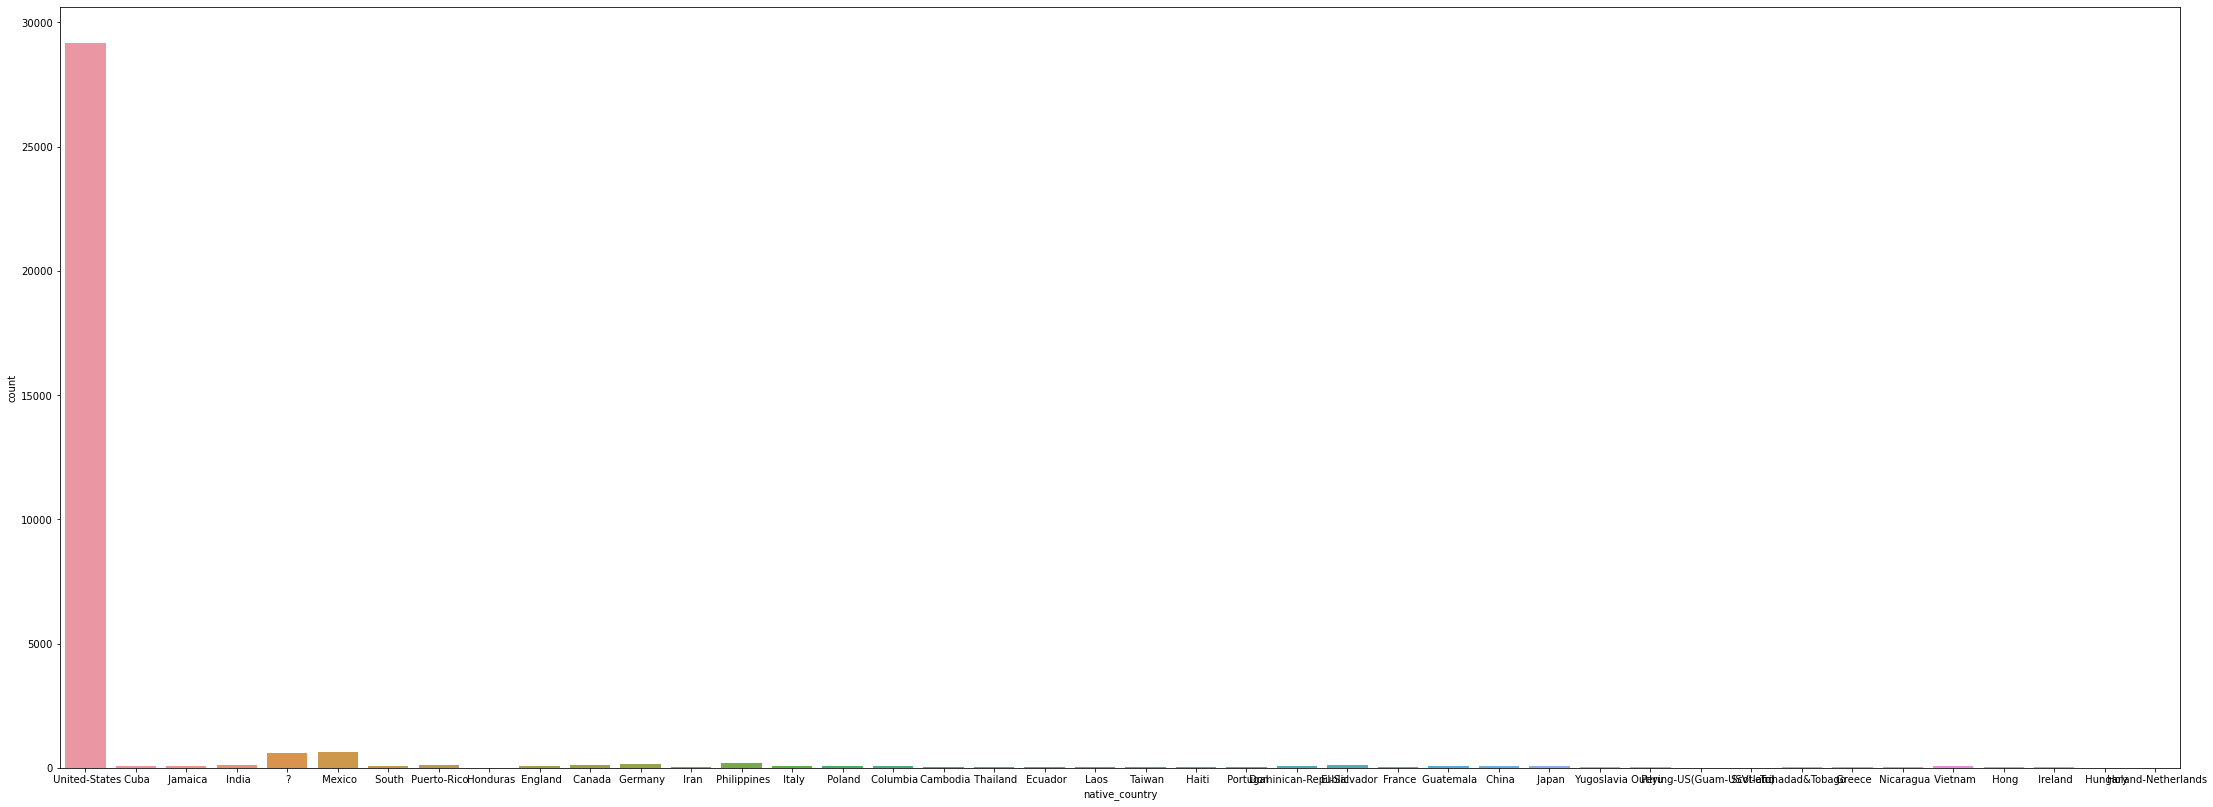

In [19]:
plt.figure(figsize=(38,14))
sns.countplot(x='native_country',data=train_set)

1.so through this Graphical analysis we can say mostly people are from US,so we can drop this column as it creates unnecessary bias.

now we are converting each object column into category so that some analysis and dependency among features could be found

In [20]:
for column in train_set:
    enc=LabelEncoder()
    if train_set.dtypes[column]==np.object:
         train_set[column]=enc.fit_transform(train_set[column])

In [21]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,0,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,1,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,1,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,1,10,5,2,0,0,0,40,5,0


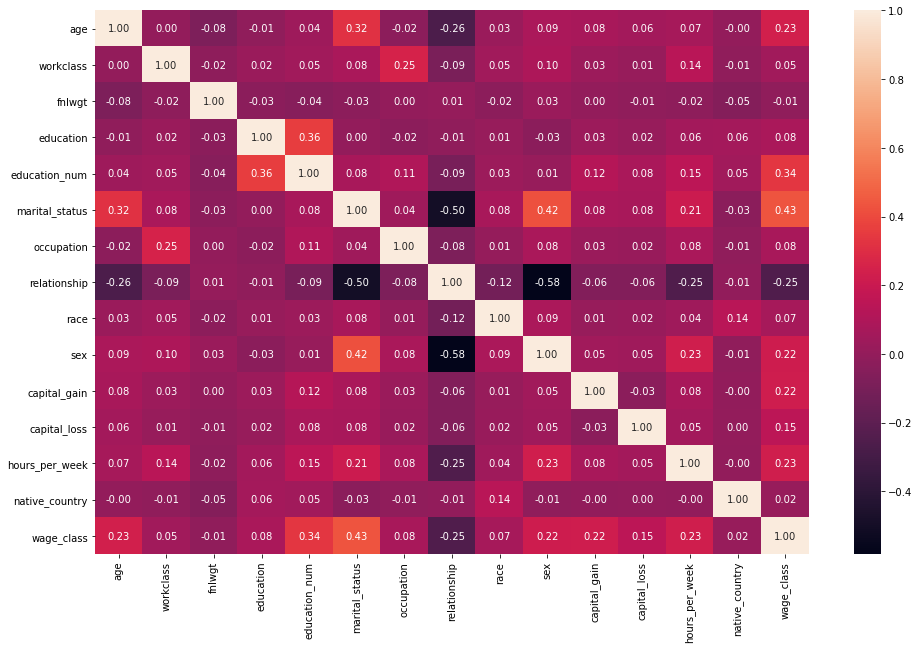

In [22]:
plt.figure(figsize=(16,10))
sns.heatmap(train_set.corr(),annot=True,fmt='.2f')
plt.show()


As we can see from the heatmap "education" and "education_num" are positively correlated, while "marital.status" and "relationship" , are negatively cor-related thus,we can drop "relationship" and "education".
We can also drop "occupation" as "workclass" is sufficient. 
Furthermore,"fnlwgt" is not useful to us as it refers to only the sampling in the census conducted and has no practical effect on the label

In [23]:
train_set=train_set.drop(['relationship','education','native_country','occupation','fnlwgt'],axis=1)

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   education_num   32561 non-null  int64
 3   marital_status  32561 non-null  int64
 4   race            32561 non-null  int32
 5   sex             32561 non-null  int32
 6   capital_gain    32561 non-null  int64
 7   capital_loss    32561 non-null  int64
 8   hours_per_week  32561 non-null  int64
 9   wage_class      32561 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 2.1 MB


In [25]:
train_set.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,39,7,13,0,4,1,2174,0,40,0
1,50,6,13,1,4,1,0,0,13,0
2,38,4,9,0,4,1,0,0,40,0
3,53,4,7,1,2,1,0,0,40,0
4,28,4,13,1,2,0,0,0,40,0


In [26]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
X=train_set.drop(['wage_class'],axis=1)
y=train_set['wage_class']

In [28]:
X.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week
0,39,7,13,0,4,1,2174,0,40
1,50,6,13,1,4,1,0,0,13
2,38,4,9,0,4,1,0,0,40
3,53,4,7,1,2,1,0,0,40
4,28,4,13,1,2,0,0,0,40


In [29]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)

In [30]:
# X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,test_size=.30,random_state=45)

In [31]:
xgb_model=XGBClassifier(objective='binary:logistic')

we are providing training to complete train_set bcz for testing we are provided test_data

In [32]:
# xgb_model.fit(X_train,y_train)
xgb_model.fit(scaled_data,y)

C:\Users\poona\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
from sklearn.metrics import accuracy_score
# y_pred = xgb_model.predict(X_train)
y_pred = xgb_model.predict(scaled_data)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y,predictions)
accuracy

0.8816682534320199

In [34]:
# test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)
test_set = pd.read_csv('adult.test' , skiprows = 1, header = None)

In [35]:
test_set.columns = col_labels

In [36]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [37]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [38]:
test_set['wage_class'].sample(5)

14088     <=50K.
2770      <=50K.
1029      <=50K.
10546      >50K.
1985      <=50K.
Name: wage_class, dtype: object

In [39]:
test_set['wage_class']=test_set['wage_class'].map({' <=50K.': 0, ' >50K.': 1})

In [40]:
test_set['wage_class'].sample(5)

806      0
3194     1
13710    0
7803     1
624      0
Name: wage_class, dtype: int64

In [41]:
test_set['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Widowed', ' Divorced',
       ' Separated', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype=object)

In [42]:
test_set['marital_status']=test_set['marital_status'].map({' Married-civ-spouse':'Married',' Married-spouse-absent':'Married',' Married-AF-spouse':'Married',' Never-married':'Single',' Divorced':'Single',' Separated':'Single',' Widowed':'Single'})

In [43]:
test_set['marital_status']=test_set['marital_status'].map({'Single':0,'Married':1})

In [44]:
for column in test_set:
    enc=LabelEncoder()
    if test_set.dtypes[column]==np.object:
         test_set[column]=enc.fit_transform(test_set[column])

In [45]:
test_set=test_set.drop(['relationship','education','native_country','occupation','fnlwgt'],axis=1)

In [46]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16281 non-null  int64
 1   workclass       16281 non-null  int32
 2   education_num   16281 non-null  int64
 3   marital_status  16281 non-null  int64
 4   race            16281 non-null  int32
 5   sex             16281 non-null  int32
 6   capital_gain    16281 non-null  int64
 7   capital_loss    16281 non-null  int64
 8   hours_per_week  16281 non-null  int64
 9   wage_class      16281 non-null  int64
dtypes: int32(3), int64(7)
memory usage: 1.1 MB


In [47]:
test_set.head()

,age,workclass,education_num,marital_status,race,sex,capital_gain,capital_loss,hours_per_week,wage_class
0,25,4,7,0,2,1,0,0,40,0
1,38,4,9,1,4,1,0,0,50,0
2,28,2,12,1,4,1,0,0,40,1
3,44,4,10,1,2,1,7688,0,40,1
4,18,0,10,0,4,0,0,0,30,0


In [48]:
X_test=test_set.drop(['wage_class'],axis=1)
y_test=test_set['wage_class']

In [49]:
scaler=StandardScaler()
scaled_data_test=scaler.fit_transform(X_test)

In [50]:
# cheking initial test accuracy
y_pred = xgb_model.predict(scaled_data_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8561513420551563

on training dataset we are getting 88% accuracy but on testing we are getting 85% let's try to increase it by hyper parametertuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:

param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [53]:
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3)

In [54]:
grid.fit(scaled_data,y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.847, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\poona\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.848, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.854, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.853, total=   0.1s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 .............

[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.867, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[15:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.870, total=   0.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 ..........

[CV]   learning_rate=1, max_depth=5, n_estimators=10, score=0.857, total=   0.1s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 ..................
[15:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=5, n_estimators=10, score=0.861, total=   0.2s
[CV]  learning_rate=1, max_depth=5, n_estimators=10 .............

[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.868, total=   0.9s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 .................
[15:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=5, n_estimators=100, score=0.868, total=   0.9s
[CV]  learning_rate=1, max_depth=5, n_estimators=100 ..........

[CV]   learning_rate=1, max_depth=10, n_estimators=10, score=0.866, total=   0.2s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 .................
[15:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=10, n_estimators=10, score=0.868, total=   0.2s
[CV]  learning_rate=1, max_depth=10, n_estimators=10 ..........

[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.863, total=   1.2s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 ................
[15:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=10, n_estimators=100, score=0.862, total=   1.7s
[CV]  learning_rate=1, max_depth=10, n_estimators=100 .......

[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.858, total=   0.6s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 .................
[15:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=20, n_estimators=10, score=0.861, total=   0.7s
[CV]  learning_rate=1, max_depth=20, n_estimators=10 ..........

[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.852, total=   4.3s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 ................
[15:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=1, max_depth=20, n_estimators=100, score=0.851, total=   4.0s
[CV]  learning_rate=1, max_depth=20, n_estimators=100 .......


[15:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=3, n_estimators=10, score=0.853, total=   0.1s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10 ................
[15:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default ev

[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.870, total=   0.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=100 ...............
[15:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=3, n_estimators=100, score=0.866, total=   0.7s
[CV]  learning_rate=0.5, max_depth=3, n_estimators=200 ....


[15:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=5, n_estimators=10, score=0.861, total=   0.2s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=10 ................
[15:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default ev

[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.868, total=   1.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[15:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.870, total=   1.0s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ....

[CV]   learning_rate=0.5, max_depth=10, n_estimators=10, score=0.868, total=   0.4s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=10 ...............
[15:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=10, n_estimators=10, score=0.864, total=   0.4s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=50 ....

[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.862, total=   1.9s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=100 ..............
[15:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=10, n_estimators=100, score=0.861, total=   2.0s
[CV]  learning_rate=0.5, max_depth=10, n_estimators=200 .

[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.861, total=   0.5s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=10 ...............
[15:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=20, n_estimators=10, score=0.857, total=   0.5s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=50 ....

[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.851, total=   4.2s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=100 ..............
[15:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.5, max_depth=20, n_estimators=100, score=0.852, total=   4.4s
[CV]  learning_rate=0.5, max_depth=20, n_estimators=200 .

[CV]   learning_rate=0.1, max_depth=3, n_estimators=10, score=0.856, total=   0.1s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 ................
[15:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=3, n_estimators=50, score=0.854, total=   0.4s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50 .......

[CV]   learning_rate=0.1, max_depth=3, n_estimators=100, score=0.866, total=   0.7s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ...............
[15:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=3, n_estimators=200, score=0.860, total=   1.2s
[CV]  learning_rate=0.1, max_depth=3, n_estimators=200 ....

[CV]   learning_rate=0.1, max_depth=5, n_estimators=10, score=0.858, total=   0.2s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 ................
[15:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=5, n_estimators=50, score=0.858, total=   0.6s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=50 .......

[CV]   learning_rate=0.1, max_depth=5, n_estimators=100, score=0.870, total=   1.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ...............
[15:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=5, n_estimators=200, score=0.860, total=   2.1s
[CV]  learning_rate=0.1, max_depth=5, n_estimators=200 ....

[CV]   learning_rate=0.1, max_depth=10, n_estimators=10, score=0.864, total=   0.3s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50 ...............
[15:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=10, n_estimators=50, score=0.858, total=   1.2s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=50 ....

[CV]   learning_rate=0.1, max_depth=10, n_estimators=100, score=0.861, total=   1.9s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 ..............
[15:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=10, n_estimators=200, score=0.852, total=   3.5s
[CV]  learning_rate=0.1, max_depth=10, n_estimators=200 .

[CV]   learning_rate=0.1, max_depth=20, n_estimators=10, score=0.857, total=   0.6s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ...............
[15:27:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=20, n_estimators=50, score=0.848, total=   2.3s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=50 ....

[CV]   learning_rate=0.1, max_depth=20, n_estimators=100, score=0.852, total=   4.6s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 ..............
[15:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.1, max_depth=20, n_estimators=200, score=0.838, total=   8.1s
[CV]  learning_rate=0.1, max_depth=20, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.856, total=   0.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[15:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.854, total=   0.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ....

[CV]   learning_rate=0.01, max_depth=3, n_estimators=100, score=0.866, total=   0.7s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 ..............
[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=3, n_estimators=200, score=0.860, total=   1.4s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.858, total=   0.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ...............
[15:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=5, n_estimators=50, score=0.861, total=   0.5s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=50 ....

[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.860, total=   2.0s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 ..............
[15:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=5, n_estimators=200, score=0.860, total=   1.9s
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200 .

[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.858, total=   1.1s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 ..............
[15:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=10, n_estimators=50, score=0.860, total=   1.1s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=50 .

[CV]   learning_rate=0.01, max_depth=10, n_estimators=200, score=0.852, total=   4.1s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=200 .............
[15:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=10, n_estimators=200, score=0.853, total=   3.6s
[CV]  learning_rate=0.01, max_depth=10, n_estimators=20

[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.848, total=   2.4s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 ..............
[15:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=20, n_estimators=50, score=0.850, total=   2.5s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=50 .

[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.838, total=   8.4s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=200 .............
[15:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.01, max_depth=20, n_estimators=200, score=0.842, total=   7.6s
[CV]  learning_rate=0.01, max_depth=20, n_estimators=20

[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.854, total=   0.4s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 ..............
[15:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=3, n_estimators=50, score=0.861, total=   0.4s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=50 .

[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.860, total=   1.4s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=200 .............
[15:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=3, n_estimators=200, score=0.863, total=   1.3s
[CV]  learning_rate=0.001, max_depth=3, n_estimators=20

[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.858, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[15:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.861, total=   0.6s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 .

[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.860, total=   2.0s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=200 .............
[15:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=5, n_estimators=200, score=0.860, total=   2.1s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=20

[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.858, total=   1.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=50 .............
[15:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=10, n_estimators=50, score=0.860, total=   1.2s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=5

[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.852, total=   3.5s
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200 ............
[15:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=10, n_estimators=200, score=0.853, total=   3.8s
[CV]  learning_rate=0.001, max_depth=10, n_estimators

[CV]   learning_rate=0.001, max_depth=20, n_estimators=50, score=0.848, total=   2.6s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=50 .............
[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=20, n_estimators=50, score=0.850, total=   2.7s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=5

[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.838, total=   8.3s
[CV]  learning_rate=0.001, max_depth=20, n_estimators=200 ............
[15:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: {  learning_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]   learning_rate=0.001, max_depth=20, n_estimators=200, score=0.842, total=   8.5s
[CV]  learning_rate=0.001, max_depth=20, n_estimators

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 12.0min finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [55]:
grid.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 200}

In [56]:
# Create new model using the same parameters
new_model=XGBClassifier(learning_rate= 1, max_depth= 3, n_estimators= 200)
new_model.fit(scaled_data, y)

[15:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
y_pred = new_model.predict(scaled_data_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8528960137583687

by hyper parameter tuning we are getting almost same result so we can say it is perfectly calculated